In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras import layers, models,Input
from keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)


train_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
train_gen.fit(x_train)
batch_size = 64
train_generator = train_gen.flow(x_train,y_train,batch_size = batch_size)

In [12]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (100,100,3)
)
conv_base.trainable = False
input_shape = (100,100,3)
inputs = Input(shape = input_shape)

In [13]:
x = (conv_base)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(64,activation = 'relu')(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)

model = models.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,009,729 (57.26 MB)

 Trainable params: 295,041 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(optimizer = 'adam',metrics = ['accuracy'], loss = 'binary_crossentropy')
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_test,y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7733 - loss: 3.8608 - val_accuracy: 0.8925 - val_loss: 0.2781
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9375 - loss: 0.1792 - val_accuracy: 0.9000 - val_loss: 0.2878
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9775 - loss: 0.0571 - val_accuracy: 0.9025 - val_loss: 0.2645
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9928 - loss: 0.0270 - val_accuracy: 0.9100 - val_loss: 0.3087
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9987 - loss: 0.0070 - val_accuracy: 0.9050 - val_loss: 0.3399
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 834ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9075 - val_loss: 0.3667
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 694ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9075 - val_loss: 0.3801
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 696ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9075 - 

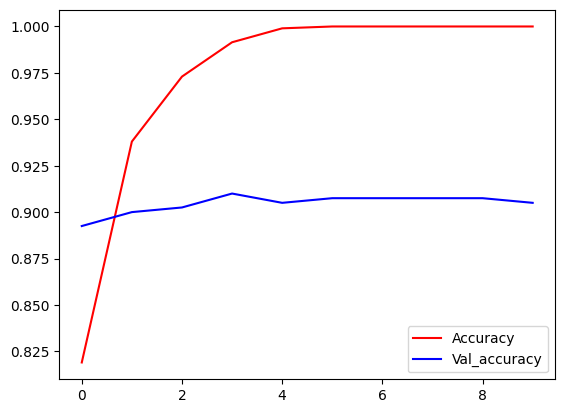

In [15]:
plt.plot(history.history['accuracy'],color = 'red', label = 'Accuracy')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'Val_accuracy')
plt.legend()
plt.show()


In [16]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 531ms/step - accuracy: 0.8996 - loss: 0.4901


[0.41787588596343994, 0.9049999713897705]

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,599,813 (59.51 MB)

 Trainable params: 295,041 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 590,084 (2.25 MB)